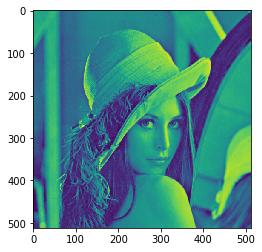

In [80]:
from PIL import Image
import numpy
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

image =Image.open('lena512.bmp')
image = numpy.array(image)    
plt.imshow(image)

In [81]:
def resize_image(image, size_reduction = 8):
    results = np.zeros((image.shape[0]// size_reduction ,image.shape[1]// size_reduction ))
    for yPosition in range(0, image.shape[0] - size_reduction, size_reduction):
        for xPosition in range(0, image.shape[1] - size_reduction, size_reduction):
            results[yPosition //size_reduction, xPosition//size_reduction] = image[yPosition, xPosition]
    return results
#plt.imshow(results)

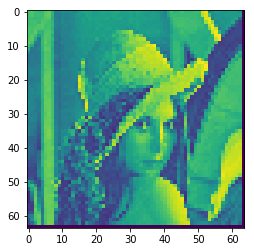

In [82]:
resized_image = resize_image(image)
plt.imshow(resized_image)

In [83]:
def conviulutionKernel(kernelList, inputImage):
    assert  kernelList.shape[0] ==  kernelList.shape[1]
    kernelSizeXY = kernelList.shape[0]
    results = np.zeros((inputImage.shape))
    for yPosition in range(inputImage.shape[0]-kernelSizeXY):
        for xPosition in range(inputImage.shape[1]-kernelSizeXY):
            windowArea = inputImage[yPosition:yPosition+kernelSizeXY,
                                    xPosition:xPosition+kernelSizeXY]
            appliedKernel = windowArea * kernelList
            results[yPosition, xPosition] = np.sum(appliedKernel)
    return results

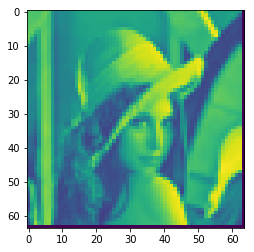

In [84]:
def fspecial_gauss(size=12, sigma=100):
    # https://stackoverflow.com/questions/17190649/how-to-obtain-a-gaussian-filter-in-python
    """Function to mimic the 'fspecial' gaussian MATLAB function
    """

    x, y = numpy.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = numpy.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/g.sum()

conv_image = conviulutionKernel(fspecial_gauss(), image)
anti_aliasing = reduce_size_image(conv_image)
plt.imshow(anti_aliasing)

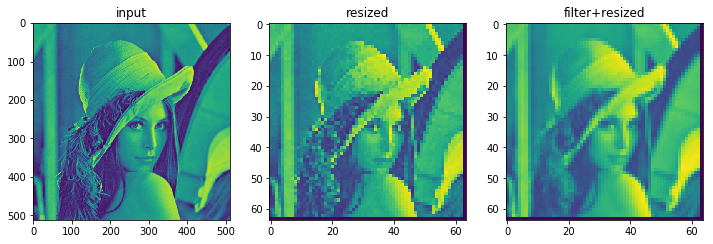

In [85]:
figure, axes = plt.subplots(1,3, figsize=(12, 12))
axes[0].set_title("input")
axes[0].imshow(image)
axes[1].set_title("resized")
axes[1].imshow(resized_image)
axes[2].set_title("filter+resized")
axes[2].imshow(anti_aliasing)